In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

# Linear Convection

The following notebook seeks to perform a numerical discretization and solution to the 1-D linear convection equation:

$$ \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0 $$

where ```c``` is the initial speed of the propagation of the wave. Using a forward time-centered space scheme for the time derivative and a backward difference for the space derivative, the linear convection equation can be discretized as:

$$ \frac{u^{n+1}_i - u^n_i}{\Delta t} + c\frac{u^n_i - u^n_{i-1}}{\Delta x} = 0$$

In [2]:
nx = 41        # Number of grid points
L = 2.         # System length
dx = L/(nx-1)  # Grid point spacing
nt = 25        # Number of timesteps
dt = 0.025     # Length of each timestep
c = 1.         # Wavespeed 

We need to set up the initial conditions. The initial velocity $u_0$ is given as $u = 2$ in the interval $0.5 \leq x \leq 1$ and $u=1$ everywhere else in $(0, 2)$.

In [3]:
u = np.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2
u

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

Text(0, 0.5, 'Speed (m/s)')

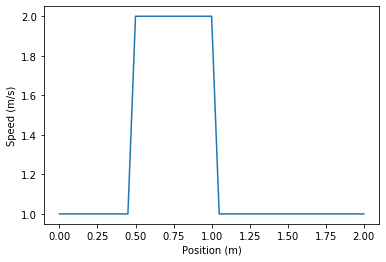

In [4]:
plt.plot(np.linspace(0, 2, nx), u)
plt.xlabel('Position (m)')
plt.ylabel('Speed (m/s)')

To solve the discretized scheme, we use the solution:

$$ u^{n+1}_i = u^n_i - \frac{\Delta t}{\Delta x} c (u^n_i - u^n_{i-1}) $$

In [5]:
un = np.ones(nx)      # Array for storing new values
plot_num = 5
t_plot = np.empty((nt, nx))
for j in range(nt): ## MAIN LOOP ##
    un = np.copy(u)
    for i in range(1, nx):
        u[i] = un[i] - dt/dx * c * (un[i] - un[i-1])
    t_plot[j, :] = u

In [6]:
x = np.linspace(0, L, nx)   # x coordinates

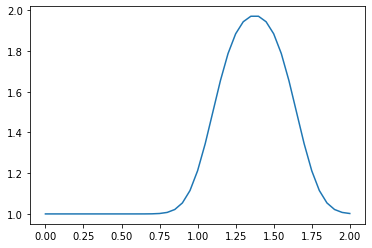

In [7]:
plt.plot(x, t_plot[-1, :])

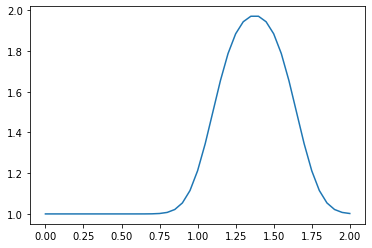

In [8]:
plt.plot(x, u)

# Nonlinear Convection

If we replace the constant wave velocity ```c``` instead with the variable velocity ```u```, we get the nonlinear convection equation:

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0 $$

The rest of the code remains the same.

In [12]:
nx = 41        # Number of grid points
L = 2.         # System length
dx = L/(nx-1)  # Grid point spacing
nt = 50        # Number of timesteps
dt = 0.025     # Length of each timestep
u = np.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2

In [13]:
un = np.ones(nx)      # Array for storing new values
plot_num = 5
t_plot = np.empty((nt, nx))
for j in range(nt): ## MAIN LOOP ##
    un = np.copy(u)
    for i in range(1, nx):
        u[i] = un[i] - dt/dx * c * (un[i] - un[i-1])
    t_plot[j, :] = u

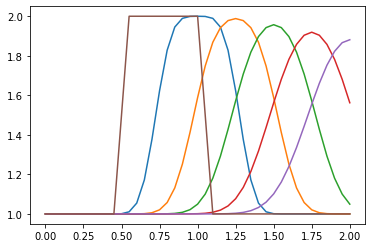

In [14]:
for i in range(1, 6):
    plt.plot(x, t_plot[int(nt/5)*i - 1, :])
plt.plot(x, t_plot[0, :])

# 1-D Diffusion

The diffusion equation contains a second-order derivative:

$$ \frac{\partial u}{\partial t} + \nu\frac{\partial^2 u}{\partial x^2} = 0 $$

Discretizing this from a Taylor Expansion and omitting all terms of order 4 or higher, we get:

$$ u^{n+1}_i = u^n_i + \frac{\nu\Delta t}{\Delta x^2}(u^n_{i+1} - 2u^n_i + u^n_{i-1}) $$

In [16]:
nx = 41        # Number of grid points
L = 2.         # System length
dx = L/(nx-1)  # Grid point spacing
nt = 20        # Number of timesteps
nu = 0.3       # Viscocity
sigma = 0.2    # Courant number, for stability
dt = sigma * dx**2/nu
u = np.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2

un = np.ones(nx)

for i in range(nt):
    un = np.copy(u)
    for j in range(1, nx-1): # Boundary conditions are u = 1 at 0, L
        u[j] = un[j] + nu*dt/dx**2 * (un[j+1] - 2*un[j] + un[j-1])

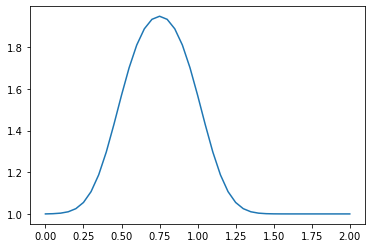

In [17]:
plt.plot(x, u)